# Fetching the MNIST Dataset

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", version=1, as_frame=False)

In [2]:
type(mnist)

sklearn.utils.Bunch

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# Setting up the dataset
X, y = mnist["data"], mnist["target"]

# Looking at the data

In [5]:
type(X)

numpy.ndarray

In [6]:
len(X)

70000

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

# Train test split

In [4]:
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]

In [5]:
y[0]

'5'

In [7]:
import numpy as np
y_train, y_test = y_train.astype(np.uint8), y_test.astype(np.uint8)

# Looking at the data more

In [10]:
from matplotlib import pyplot as plt
import numpy as np

In [11]:
some_digit = X_train[0]

some_digit_image = np.reshape(some_digit, (28, 28))

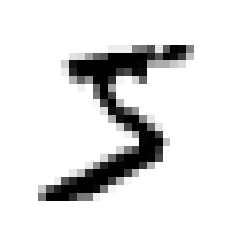

In [12]:
plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

In [8]:
y_train[0]

5

# Binary classifer to determine if the number is 7 or not

In [25]:
y_train_7 = (y_train == 7)
y_test_7 = (y_test == 7)

In [9]:
from sklearn.linear_model import SGDClassifier
import pickle

def train_and_save_classifier(classifier_type, name, x, y, **kwargs):
    classifier =  classifier_type(**kwargs)
    classifier.fit(x, y)
    file_path = 'saved_models/' + name + '.pkl'
    with open(file_path, 'wb') as file:
        pickle.dump(classifier, file)
        
# train_and_save_classifier(SGDClassifier, 'sgd_classifier', X_train, y_train_7, max_iter=1000, tol=1e-3)

In [10]:
def load_classifier(name):
    file_path = 'saved_models/' + name + '.pkl'
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    return model

# sgd_classifier = load_classifier('sgd_classifier')

In [30]:
sgd_classifier.predict([some_digit])

array([False])

## Evaluating the SGDClassifier with some metrics

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score

def evaluate_classifier(classifier, x, y, **kwargs):
    print("Accuracy: ", cross_val_score(classifier, x, y, cv=3, scoring="accuracy"))
    predicted_values = cross_val_predict(classifier, x, y, cv=3)
    conf_matrix = confusion_matrix(y, predicted_values)
    print("\nConfusion Metrix: ")
    print(conf_matrix)
    
    print("\nPrecision Score: ", precision_score(y, predicted_values, **kwargs))
    print("Recall Score: ", recall_score(y, predicted_values, **kwargs))
    print("f1 Score: ", f1_score(y, predicted_values, **kwargs))
    
    print("\nROC AUC Score: ", roc_auc_score(y, predicted_values, **kwargs))

# evaluate_classifier(sgd_classifier, X_train, y_train_7)

# Training a SV classifier

In [32]:
from sklearn import svm

train_and_save_classifier(svm.SVC, 'sv_classifier', X_train, y_train_7, random_state=42)

## Evaluating SV classifier with some selected metrics

In [33]:
sv_classifier = load_classifier('sv_classifier')
evaluate_classifier(sv_classifier, X_train, y_train_7)

Accuracy:  [0.9945  0.99305 0.99415]

Confusion Metrix: 
[[53630   105]
 [  261  6004]]

Precision Score:  0.9828122442298248
Recall Score:  0.9583399840383081
f1 Score:  0.9704218522708906

ROC AUC Score:  0.9781929751772447


# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
train_and_save_classifier(RandomForestClassifier, 'random_forest_classifier', X_train, y_train_7, random_state=42)

## Evaluation of the Random Forest Classifier

In [35]:
random_forest_classifier = load_classifier('random_forest_classifier')
evaluate_classifier(random_forest_classifier, X_train, y_train_7)

Accuracy:  [0.98835 0.988   0.9893 ]

Confusion Metrix: 
[[53659    76]
 [  611  5654]]

Precision Score:  0.9867364746945899
Recall Score:  0.9024740622505986
f1 Score:  0.9427261358899541

ROC AUC Score:  0.9505298570302031


# Logistic Regression Classifier

In [36]:
from sklearn.linear_model import LogisticRegression
train_and_save_classifier(LogisticRegression, 'logistic_regression_classifier', X_train, y_train_7, random_state=42)

C:\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Evaluation of logistic regression classifier

In [37]:
logistic_regression_classifier = load_classifier('logistic_regression_classifier')
evaluate_classifier(logistic_regression_classifier, X_train, y_train_7)

C:\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Accuracy:  [0.98435 0.98225 0.98315]


C:\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che


Confusion Metrix: 
[[53297   438]
 [  567  5698]]

Precision Score:  0.9286179921773142
Recall Score:  0.9094972067039107
f1 Score:  0.9189581485364083

ROC AUC Score:  0.9506730473828477


# KNeighbors classifier

In [40]:
from sklearn.neighbors import KNeighborsClassifier
train_and_save_classifier(KNeighborsClassifier, 'kneighbors_classifier', X_train, y_train_7)

## Evaluation of KNeighbors classifier

In [41]:
kneignbors_classifier = load_classifier('kneighbors_classifier')
evaluate_classifier(kneignbors_classifier, X_train, y_train_7)

Accuracy:  [0.99425 0.9923  0.9928 ]

Confusion Metrix: 
[[53511   224]
 [  189  6076]]

Precision Score:  0.9644444444444444
Recall Score:  0.9698324022346368
f1 Score:  0.9671309192200558

ROC AUC Score:  0.9828318985212451


# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
train_and_save_classifier(DecisionTreeClassifier, 'decision_tree_classifier', X_train, y_train_7, random_state=42)

## Evaluation of Decision Tree Classifier

In [43]:
decision_tree_classifier = load_classifier('decision_tree_classifier')
evaluate_classifier(decision_tree_classifier, X_train, y_train_7)

Accuracy:  [0.97475 0.97525 0.9773 ]

Confusion Metrix: 
[[52976   759]
 [  695  5570]]

Precision Score:  0.8800758413651446
Recall Score:  0.8890662410215483
f1 Score:  0.884548197554391

ROC AUC Score:  0.937470684482115


# Training Multiclass Classifiers for the MNIST Dataset

## SVM Multiclassifer

In [12]:
from sklearn.svm import SVC

train_and_save_classifier(SVC, 'sv_multiclassifier', X_train, y_train, random_state=42)

In [17]:
# evaluating the SVM multiiclassifier
sv_multiclassifier = load_classifier('sv_multiclassifier')
evaluate_classifier(sv_multiclassifier, X_train, y_train, average='micro')

Accuracy:  [0.977  0.9738 0.9739]

Confusion Metrix: 
[[5863    3   10    2    4    8   14    2   13    4]
 [   1 6664   26    9   10    1    3   10   10    8]
 [  19    9 5811   16   26    5    8   30   28    6]
 [   3    9   54 5891    2   62    1   30   61   18]
 [   5   11   13    0 5712    0   20    9    4   68]
 [  11    6   10   57   14 5255   35    4   17   12]
 [  20    8    7    0   10   32 5831    0   10    0]
 [   5   21   42    6   35    2    1 6100    7   46]
 [   8   29   19   38   20   39   21    9 5646   22]
 [  14   11    4   31   72   16    2   59   19 5721]]

Precision Score:  0.9749
Recall Score:  0.9749
f1 Score:  0.9749


ValueError: multi_class must be in ('ovo', 'ovr')